In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [4]:
df.isnull().sum()
# No missing Data

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [5]:
level0 = df.loc[(df['recovery_strategy'] == 'Level 0 Recovery')]
level1 = df.loc[(df['recovery_strategy'] == 'Level 1 Recovery')]
level2 = df.loc[(df['recovery_strategy'] == 'Level 2 Recovery')]
level3 = df.loc[(df['recovery_strategy'] == 'Level 3 Recovery')]
level4 = df.loc[(df['recovery_strategy'] == 'Level 4 Recovery')]

Text(0, 0.5, 'Recovery Amount')

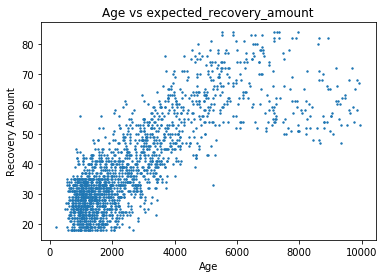

In [6]:
plt.scatter(df['expected_recovery_amount'],df['age'], s=2)
plt.title("Age vs expected_recovery_amount")
plt.xlabel("Age")
plt.ylabel("Recovery Amount")

Text(0, 0.5, 'Recovery Amount')

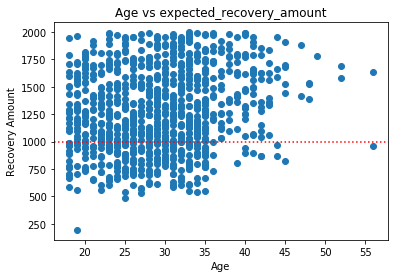

In [12]:
x = pd.concat([level0['age'], level1['age']])
y = pd.concat([level0['expected_recovery_amount'],level1['expected_recovery_amount']]).values
plt.scatter(x,y)
plt.axhline(1000, color='red', ls='dotted')
plt.title("Age vs expected_recovery_amount")
plt.xlabel("Age")
plt.ylabel("Recovery Amount")
# There's no regression discontinuity

Exploring between $900 & $1100

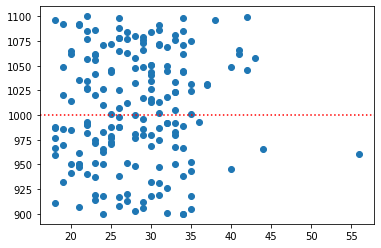

In [7]:
y = df.loc[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
x = y['age'].values
plt.scatter(x,y['expected_recovery_amount'].values)
plt.axhline(1000, color='red', ls='dotted')

In [9]:
from scipy import stats
df_900_1100 = df.loc[(df['expected_recovery_amount']  >= 900) & (df['expected_recovery_amount'] < 1100)]
lvl0_age = df_900_1100.loc[(df_900_1100['recovery_strategy'] == 'Level 0 Recovery')]['age']
lvl1_age = df_900_1100.loc[(df_900_1100['recovery_strategy'] == 'Level 1 Recovery')]['age']
stats.kruskal(lvl0_age,lvl1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [15]:
df_900_1100['recovery_strategy']

158    Level 0 Recovery
159    Level 0 Recovery
160    Level 0 Recovery
161    Level 0 Recovery
162    Level 0 Recovery
             ...       
336    Level 1 Recovery
337    Level 1 Recovery
338    Level 1 Recovery
339    Level 1 Recovery
340    Level 1 Recovery
Name: recovery_strategy, Length: 183, dtype: object

In [16]:
crosstab = pd.crosstab(['recovery_stradf_900_1100tegy'],df_900_1100['sex'])
chi2_stat , p_val, dof, ex = stats.chi2_contingency(crosstab)
print(crosstab)
p_val

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


0.5377947810444592

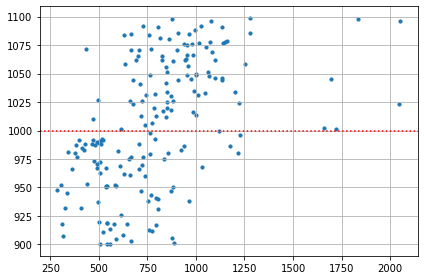

In [23]:
plt.scatter(df_900_1100['actual_recovery_amount'],df_900_1100['expected_recovery_amount'],s=10)
plt.axhline(1000, color='red', ls='dotted')
plt.tight_layout()
plt.grid(True)
# There doesn;t seem to be any discontinuity around the $1000 threshold

In [50]:
df_900_1100 = df.loc[(df['expected_recovery_amount']  >= 900) & (df['expected_recovery_amount'] < 1100)]
df_950_1050 = df.loc[(df['expected_recovery_amount']  >= 950) & (df['expected_recovery_amount'] < 1050)]
lvl0_900_1100_expected_amount = df_900_1100.loc[(df_900_1100['recovery_strategy'] == 'Level 0 Recovery')]['actual_recovery_amount']
lvl1_900_1100_expected_amount = df_900_1100.loc[(df_900_1100['recovery_strategy'] == 'Level 1 Recovery')]['actual_recovery_amount']
lvl0_950_1050_expected_amount = df_950_1050.loc[(df_950_1050['recovery_strategy'] == 'Level 0 Recovery')]['actual_recovery_amount']
lvl1_950_1050_expected_amount = df_950_1050.loc[(df_950_1050['recovery_strategy'] == 'Level 1 Recovery')]['actual_recovery_amount']
print(stats.kruskal(lvl0_900_1100_expected_amount,lvl1_900_1100_expected_amount))
print(stats.kruskal(lvl0_950_1050_expected_amount,lvl1_950_1050_expected_amount))

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)
KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


In [46]:
import statsmodels.api as sm
X = df_900_1100['expected_recovery_amount']
y = df_900_1100['actual_recovery_amount']

#sm.add_constant(X)
ols = sm.OLS(y,X).fit()
predictions = ols.predict(X)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     actual_recovery_amount   R-squared (uncentered):                   0.888
Model:                                OLS   Adj. R-squared (uncentered):              0.887
Method:                     Least Squares   F-statistic:                              1441.
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):                    2.09e-88
Time:                            23:08:04   Log-Likelihood:                         -1293.9
No. Observations:                     183   AIC:                                      2590.
Df Residuals:                         182   BIC:                                      2593.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
expected_recovery_amount     0.7958      0.021     37.963      0.000       0.754       0.837
==============================================================================
Omnibus:                       60.934   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.518
Skew:                           1.402   Prob(JB):                     1.14e-36
Kurtosis:                       6.720   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df_900_1100['threshold_indicator'] = np.where(df_900_1100['expected_recovery_amount'] < 1000, 0,1)
df_900_1100

X = df_900_1100['expected_recovery_amount']
y = df_900_1100['actual_recovery_amount']

ols = sm.OLS(y,X).fit()
predictions = ols.predict(X)
ols.summary()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     actual_recovery_amount   R-squared (uncentered):                   0.888
Model:                                OLS   Adj. R-squared (uncentered):              0.887
Method:                     Least Squares   F-statistic:                              1441.
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):                    2.09e-88
Time:                            23:12:50   Log-Likelihood:                         -1293.9
No. Observations:                     183   AIC:                                      2590.
Df Residuals:                         182   BIC:                                      2593.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
expected_recovery_amount     0.7958      0.021     37.963      0.000       0.754       0.837
==============================================================================
Omnibus:                       60.934   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.518
Skew:                           1.402   Prob(JB):                     1.14e-36
Kurtosis:                       6.720   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""